In [993]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
%matplotlib notebook


In [408]:
# Study data files
mouse_metadata_path = "/Users/tony/Documents/GitHub/The Power of Plots/Resources/Mouse_metadata.csv"
study_results_path = "/Users/tony/Documents/GitHub/The Power of Plots/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata) # read file as DataFram
stdy_df = pd.DataFrame(study_results) # read file as DataFram


In [409]:
# Combine the data into a single dataset
merge_df = mouse_df.merge(stdy_df,how='outer',left_on='Mouse ID', right_on = 'Mouse ID')

In [410]:
 # Checking the number of mice.
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [563]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['Mouse ID'].value_counts()
reindex_df = merge_df.set_index('Mouse ID')
reindex_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [412]:
# Optional: Get all the data for the duplicate mouse ID. 
reindex_df.loc['g989','Timepoint'] # duplicated ID is g989, was counted 13 times

Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64

In [413]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
reset_df = reindex_df.reset_index()
clean_table =reset_df.loc[reset_df['Mouse ID']!='g989'] 

In [586]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_table = clean_table.rename(columns={'Tumor Volume (mm3)':'Tumor Volume'})
clean_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [623]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_regimen =['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
drug_sem_df = [sem(clean_table.loc[(clean_table['Drug Regimen'] ==i),['Tumor Volume']])for i in drug_regimen]

grp_regimen = clean_table.groupby(['Drug Regimen'])
drug_mean_df = grp_regimen['Tumor Volume'].mean()
drug_median_df = grp_regimen['Tumor Volume'].median()
drug_std_df = grp_regimen['Tumor Volume'].std()
drug_var_df = grp_regimen['Tumor Volume'].var()

summary_table = {
    'drug mean':drug_mean_df,
    'drug median':drug_median_df,
    'drug variance':drug_var_df,
    'drug std deviation':drug_std_df,
    'drug SEM': drug_sem_df
}
summary_table_df = pd.DataFrame(summary_table)
summary_table_df

,drug mean,drug median,drug variance,drug std deviation,drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,[0.3293456234008309]
Ceftamin,52.591172,51.776157,39.290177,6.268188,[0.46982053275261093]
Infubinol,52.884795,51.820584,43.128684,6.567243,[0.4922356938011383]
Ketapril,55.235638,53.698743,68.553577,8.279709,[0.6038598237739697]
Naftisol,54.331565,52.509285,66.173479,8.134708,[0.5964657512424235]
Placebo,54.033581,52.288934,61.168083,7.821003,[0.5813305510593877]
Propriva,52.320930,50.446266,43.852013,6.622085,[0.544332054194047]
Ramicane,40.216745,40.673236,23.486704,4.846308,[0.3209546065084817]
Stelasyn,54.233149,52.431737,59.450562,7.710419,[0.5731109332771458]


In [601]:
clean_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<BarContainer object of 10 artists>

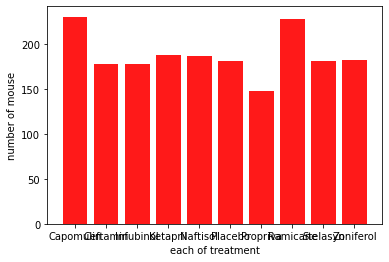

In [627]:
#Bar and Pie Charts
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
%matplotlib inline
y_axis =[len(clean_table.loc[(clean_table['Drug Regimen']==i)])for i in drug_regimen]
plt.xlabel('each of treatment')
plt.ylabel('number of mouse')
plt.bar(drug_regimen, y_axis, color = 'r',alpha = 0.9, align = 'center')

([<matplotlib.patches.Wedge at 0x7f9d40d89c10>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female mice'),
  Text(-0.007065342812707128, -1.119977714479596, 'Male mice')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.00391117191417716, -0.6199876633726333, '50.2%')])

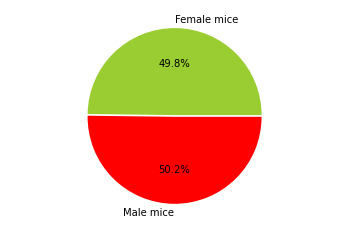

In [630]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline
clean_table['Sex'].value_counts()
gender = ["Female mice", "Male mice"]
members = [124,125]
x_axis = np.arange(0, len(gender))
colors = ["yellowgreen", "red"]
explode = (0,0.02)
plt.axis("equal")
plt.pie(members, explode = explode, labels = gender, colors = colors, autopct="%1.1f%%")

In [632]:
indices = table['Mouse ID']=='a577'
table[indices]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
524,a577,Infubinol,Female,6,25,0,45.000000,0
525,a577,Infubinol,Female,6,25,5,46.197720,1
526,a577,Infubinol,Female,6,25,10,49.509639,1
527,a577,Infubinol,Female,6,25,15,50.915007,2
528,a577,Infubinol,Female,6,25,20,52.365185,2
529,a577,Infubinol,Female,6,25,25,54.380932,2
530,a577,Infubinol,Female,6,25,30,57.031862,2


In [698]:
#Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

table = clean_table[(clean_table['Drug Regimen']=='Capomulin') | (clean_table['Drug Regimen']=='Ramicane')|(clean_table['Drug Regimen']=='Infubinol')|(clean_table['Drug Regimen']=='Ceftamin')]
final_tumor = table.groupby(['Mouse ID', 'Drug Regimen'])[["Tumor Volume"]].sum()
final_tumor

# Start by getting the last (greatest) timepoint for each mouse
# df_2 = table.groupby('Mouse ID').max()['Timepoint'].reset_index()
# df_2[df_2['Timepoint']=='45']
# df_2


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



,,Tumor Volume
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524
...,...,...
y769,Ceftamin,562.908873
y793,Capomulin,385.068292
y865,Ceftamin,549.985586


value below 175.02249999999998 could be outliers
value above 614.9625000000001 could be outliers


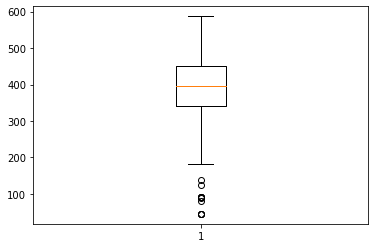

In [786]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    # add subset 
        
    # Determine outliers using upper and lower bounds
%matplotlib inline
tumor_vol = []
tumor_vol = [round(final_tumor['Tumor Volume'][i],2) for i in range(0,100)]
tumor_dic = {'tumor_vol':tumor_vol}
tumor_pd = pd.DataFrame(tumor_dic)
tumor_list = tumor_pd['tumor_vol']
#print(f"tumor vol mean value is {round(tumor_pd.tumor_list.mean(),2)}")
quantiles = tumor_list.quantile([.25,.5,.75]) 
lower_quantile = quantiles[0.25]
upper_quantile = quantiles[0.75]
iqr = upper_quantile - lower_quantile
lower_bound = lower_quantile - (1.5*iqr)
upper_bound = upper_quantile + (1.5*iqr)
print(f"value below {(lower_bound)} could be outliers")
print(f"value above {upper_bound} could be outliers")

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_list)
plt.show()


In [995]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib inline

# fig2, ax2 = plt.subplots()
# ax2.boxplot(drug_regimen)
# plt.show()



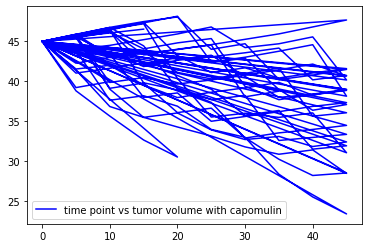

In [841]:
# Line and Scatter Plots
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# time point vs tumor volume with capomulin
%matplotlib inline
treated_capomulin = clean_table.loc[(clean_table['Drug Regimen']=='Capomulin') ]
timepoint_tumor_capmulin, = plt.plot(treated_capomulin['Timepoint'],treated_capomulin['Tumor Volume'], color='blue', label='time point vs tumor volume with capomulin')
plt.legend(handles=[timepoint_tumor_capmulin], loc="best")
plt.show()

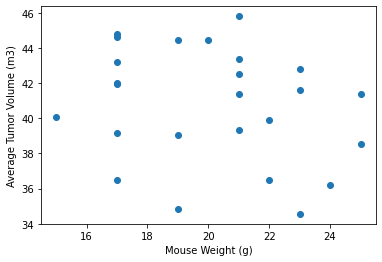

the correlation is Weight (g)    Tumor Volume    0.841936
Tumor Volume  Weight (g)      0.841936
dtype: float64


Text(0, 0.5, 'Tumor Volume')

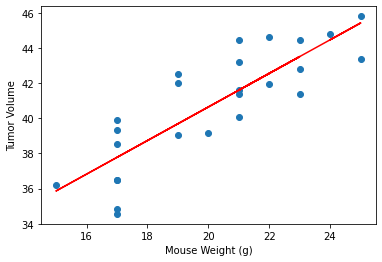

In [992]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

%matplotlib inline
avg_tumor_volume = treated_capomulin.groupby(['Mouse ID']).mean()[['Tumor Volume']]
mouse_weight = treated_capomulin.drop_duplicates(['Mouse ID'])[['Weight (g)']]
plt.scatter(x= mouse_weight,y= avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (m3)')
plt.show()

clean_treated = treated_capomulin.drop_duplicates(['Mouse ID'])[['Mouse ID','Weight (g)']]
merged_treated = clean_treated.merge(avg_tumor_volume, how='outer',left_on='Mouse ID', right_on='Mouse ID')
correlation = st.pearsonr(merged_treated['Weight (g)'],merged_treated['Tumor Volume'])

merged_corr = merged_treated.corr('pearson')
merged_unstacked = merged_corr.unstack().sort_values()
merged_unstacked = merged_unstacked[(merged_unstacked>-1) & (merged_unstacked<1)]
print(f"the correlation is {merged_unstacked}")

x_values = merged_treated['Weight (g)']
y_values = merged_treated['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')

#conclusion: there is a strong correlation between mouse weight and tumor weight in Capomulin regimen